In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 

In [3]:
df1 = pd.read_csv(r"C:\Users\soumy\Desktop\hr_data.csv")
df2 = pd.read_csv(r"C:\Users\soumy\Desktop\employee_satisfaction_evaluation.csv")

In [4]:
df = pd.merge(df1, df2, how ='inner', on ='employee_id') 
df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low,0.40,0.57
14995,87673,2,160,3,0,1,0,support,low,0.37,0.48
14996,87679,2,143,3,0,1,0,support,low,0.37,0.53
14997,87681,6,280,4,0,1,0,support,low,0.11,0.96


In [6]:
left =df.loc[:, df.columns != 'employee_id']
left_mean = left.groupby('left')
left_mean.mean()
#  Employees who left the company had low satisfaction level, low promotion rate, low salary, and worked more compare to who stayed in the company.

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation
left,,,,,,,
0,3.786664,199.060203,3.380032,0.175009,0.026251,0.666814,0.715467
1,3.855503,207.419210,3.876505,0.047326,0.005321,0.439457,0.718237


In [7]:
data=df.loc[:, df.columns != 'employee_id']
data.describe()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


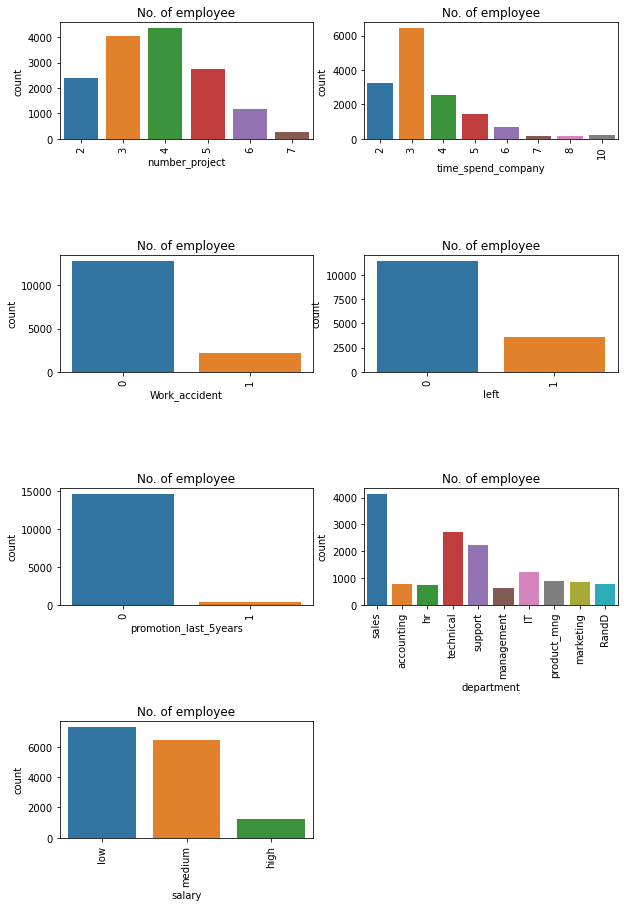

In [21]:
features=['number_project','time_spend_company','work_accident','left', 'promotion_last_5years','departments ','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sb.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")
    # Out of 15,000 approx 3,571  left, and 11,428 stayed. The no of employee left is 23 % of the total employment.
    # Most of the employee experience between 2-4 years. Also, there is a massive gap between 3 years and 4 years experienced employee.
    # Most of the employee is doing the project from 3-5.
    # Most of the employee experience between 2-4 years. Also, there is a massive gap between 3 years and 4 years experienced employee.
    #The sales department is having maximum no.of employee followed by technical and support
    # Most of the employees are getting salary either medium or low.


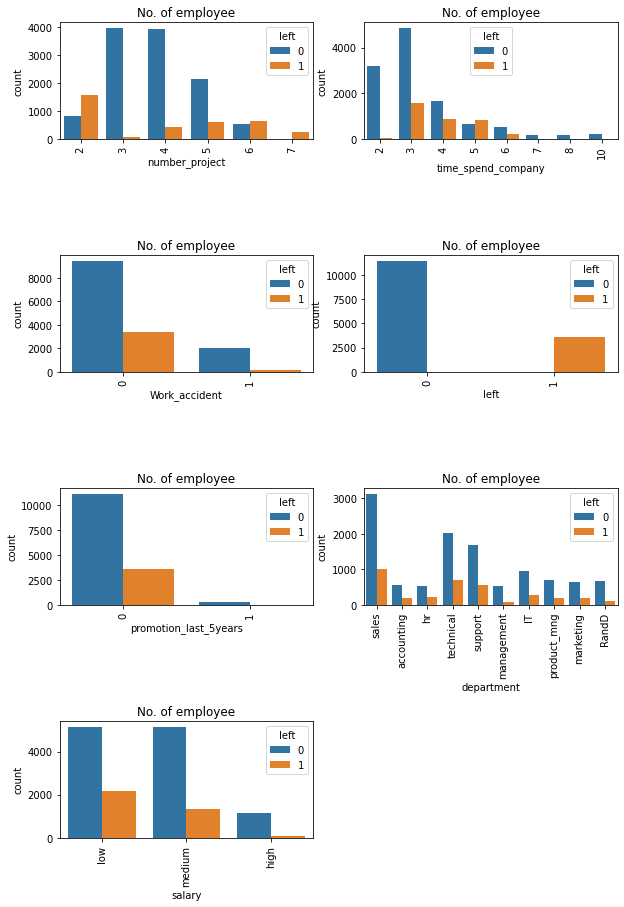

In [22]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sb.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

In [40]:
#Let's find out the groups of employees who left. You can observe that the most important factor for any employee 
#to stay or leave is satisfaction and performance in the company
# Cluster Analysis
from sklearn.cluster import KMeans
# Filter data
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]

# Handling missing values
left_emp.fillna(left_emp.mean(), inplace=True)

# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_


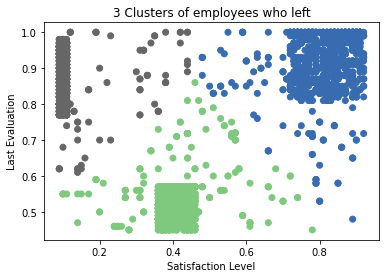

In [41]:

# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

# Employee who left the company can be grouped into 3 type of employees:

# High Satisfaction and High Evaluation - blue
#Low Satisfaction and High Evaluation - grey
#Moderate Satisfaction and moderate Evaluation -green

In [80]:
# label encoding
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df['salary']=le.fit_transform(df['salary'])
df['department']=le.fit_transform(df['department'])

In [81]:
#Split Train and Test Set
X=df[['employee_id','satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years', 'department', 'salary']]
y=df['left']
X.fillna(X.mean(), inplace=True)
x

c:\users\soumy\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1
14995,0.37,0.48,2,160,3,0,0,8,1
14996,0.37,0.53,2,143,3,0,0,8,1
14997,0.11,0.96,6,280,4,0,0,8,1


In [82]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [100]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)
#Predict the response for test dataset
y_predict = gb.predict(X_test)
d = {'employee_id':X_test['employee_id'], 
        'left_predicted':y_predict} 

Output=pd.DataFrame(d) 
Output.left_predicted.replace(to_replace=[0, 1], value=['no', 'yes'],inplace=True)
Output


,employee_id,left_predicted
6723,39782,no
6473,43211,no
4679,92619,no
862,5926,yes
7286,43124,no
...,...,...
13388,78218,no
10463,28843,no
5331,88692,no
7499,44370,no


In [99]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9802222222222222
Precision: 0.9757986447241046
Recall: 0.9402985074626866
